## 자건거 수요예측 모델 학습

코랩 파일업로드


In [2]:
from google.colab import files

# 업로드 창이 뜨고, 여기서 CSV나 엑셀 등 원하는 파일을 선택하면 됨
uploaded = files.upload()

Saving train.csv to train.csv


파일 읽기

In [13]:
import pandas as pd
df = pd.read_csv("train.csv")

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


 datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [40]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["datetime"] = pd.to_datetime(df["datetime"])
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["minute"] = df["datetime"].dt.minute
df["second"] = df["datetime"].dt.second

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


year, month, day, hour, minute, second 데이터 개수 시각화하기

<ipython-input-82-5098d5561e3d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='year', palette='Set1')
<ipython-input-82-5098d5561e3d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='month', palette='Set1')
<ipython-input-82-5098d5561e3d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='day', palette='Set1')
<ipython-input-82-5098d5561e3d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the s

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x1000 with 0 Axes>

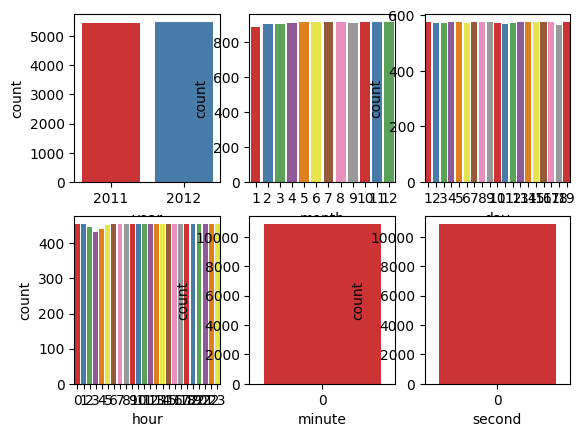

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

fig = plt.figure()
fig.add_subplot(231)
sns.countplot(df, x='year', palette='Set1')
fig.add_subplot(232)
sns.countplot(df, x='month', palette='Set1')
fig.add_subplot(233)
sns.countplot(df, x='day', palette='Set1')
fig.add_subplot(234)
sns.countplot(df, x='hour', palette='Set1')
fig.add_subplot(235)
sns.countplot(df, x='minute', palette='Set1')
fig.add_subplot(236)
sns.countplot(df, x='second', palette='Set1')

plt.show



X, y 컬럼 선택 및 train/test 데이터 분리

In [41]:
from sklearn.model_selection import train_test_split

X = df[["year", "month", "day", "hour", "minute", "second",
        "season", "holiday", "workingday", "weather",
        "temp", "atemp", "windspeed", "humidity"]]
y = df["count"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



LinearRegression 모델 학습

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(y_pred)

[248.10627003  48.79765547 200.90676727 ... 309.7528022   38.17030198
 243.62697388]


In [54]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

19945.370053753963
141.228078135171


x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

<ipython-input-84-ba30934706a4>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
<ipython-input-84-ba30934706a4>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


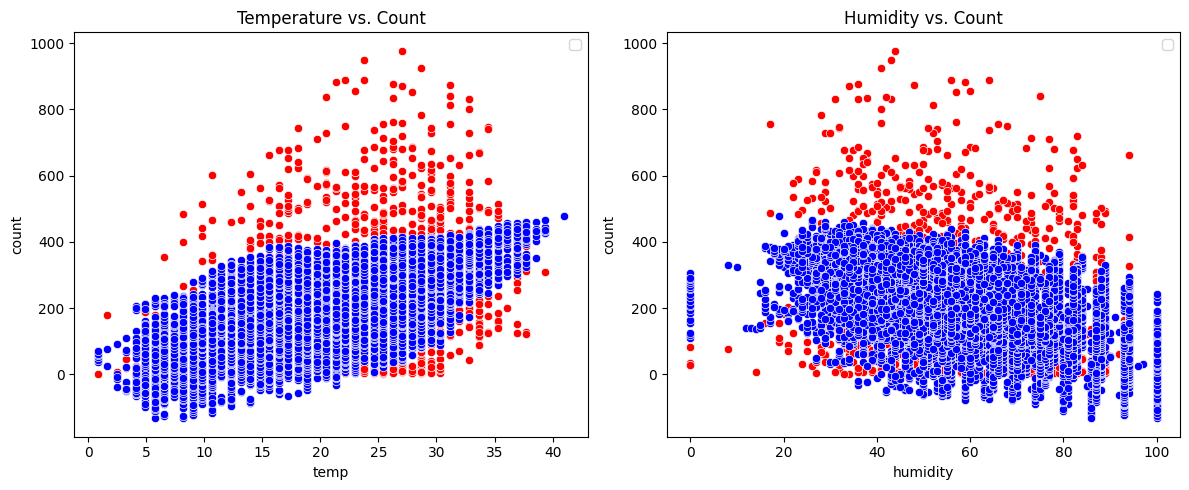

In [84]:
y_true = df["count"]
y_pred = model.predict(X)  # 예측 결과

fig = plt.figure(figsize=[12, 5])


ax1 = fig.add_subplot(121)
sns.scatterplot(x=df["temp"], y=y_test, color='red', ax=ax1)
sns.scatterplot(x=df["temp"], y=y_pred, color='blue',ax=ax1)
ax1.set_title('Temperature vs. Count')
ax1.legend()

ax2 = fig.add_subplot(122)
sns.scatterplot(x=df["humidity"], y=y_test, color='red',ax=ax2)
sns.scatterplot(x=df["humidity"], y=y_pred, color='blue', ax=ax2)
ax2.set_title('Humidity vs. Count')
ax2.legend()

plt.tight_layout()
plt.show()